In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%load_ext rpy2.ipython

In [5]:
behav = pd.read_csv("/Users/gustxsr/Documents/Stanford/PoldrackLab/github/analysisNARPS/data/narps_behav_data.csv")
behav_pupil = pd.read_csv("../../data/behavioral_data.csv")

In [10]:
pupil_subs = behav_pupil["sub"].unique()
# get all subs not in pupil_subs
not_pupil_subs =behav.query("sub not in @pupil_subs")

In [15]:
not_pupil_subs
trial_id = [i for i in range(1, 257)]*not_pupil_subs['sub'].nunique()
not_pupil_subs['trial'] = trial_id
not_pupil_subs['uncertain'] = not_pupil_subs['response_int'].apply(lambda x: 1 if x == 2 or x == 3 else 0)
not_pupil_subs = not_pupil_subs.loc[:, ~not_pupil_subs.columns.str.contains('^Unnamed')]

# Create column called dist_indiff
not_pupil_subs['dist_indiff'] = np.abs(not_pupil_subs['gain'] - not_pupil_subs['loss']) / np.sqrt(2)

/var/folders/xd/6fbjp5ms7ss8c4xxlmz91xkm0000gn/T/ipykernel_67767/1640605209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_pupil_subs['trial'] = trial_id
/var/folders/xd/6fbjp5ms7ss8c4xxlmz91xkm0000gn/T/ipykernel_67767/1640605209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_pupil_subs['uncertain'] = not_pupil_subs['response_int'].apply(lambda x: 1 if x == 2 or x == 3 else 0)


In [18]:
not_pupil_subs.to_csv("../../data/behavioral_data_non_pupil.csv")


In [21]:
behav_pupil

,Unnamed: 0,sub,run,condition,gain,loss,RT,accept,response_int,participant_response,trial,uncertain,dist_from_indiff
0,512,3,1,equalIndifference,14,14,1.247,1,4.0,strongly_accept,1,0,0.000000
1,513,3,1,equalIndifference,38,14,1.041,1,4.0,strongly_accept,2,0,16.970563
2,514,3,1,equalIndifference,10,18,2.803,1,3.0,weakly_accept,3,1,5.656854
3,515,3,1,equalIndifference,16,5,0.936,1,4.0,strongly_accept,4,0,7.778175
4,516,3,1,equalIndifference,40,12,1.142,1,4.0,strongly_accept,5,0,19.798990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13819,27643,124,4,equalRange,7,14,1.235,0,1.0,strongly_reject,252,0,4.949747
13820,27644,124,4,equalRange,5,9,1.236,0,1.0,strongly_reject,253,0,2.828427
13821,27645,124,4,equalRange,5,15,1.030,0,1.0,strongly_reject,254,0,7.071068
13822,27646,124,4,equalRange,12,18,1.029,0,1.0,strongly_reject,255,0,4.242641


In [24]:
for sub in not_pupil_subs["sub"].unique():
    print(sub)

1
2
4
8
13
15
16
17
18
21
24
26
27
29
32
35
37
38
41
44
46
50
51
55
56
57
59
67
68
69
72
73
77
83
88
90
92
93
96
100
103
104
106
107
108
110
112
113
114
116
117
119
120
121


In [11]:
# save the data into data
valid_behav.to_csv("../../data/behav_data.csv")

In [3]:
behav = behav.query('response_int.notna() & RT > 0.2')

<Axes: xlabel='RT', ylabel='Count'>

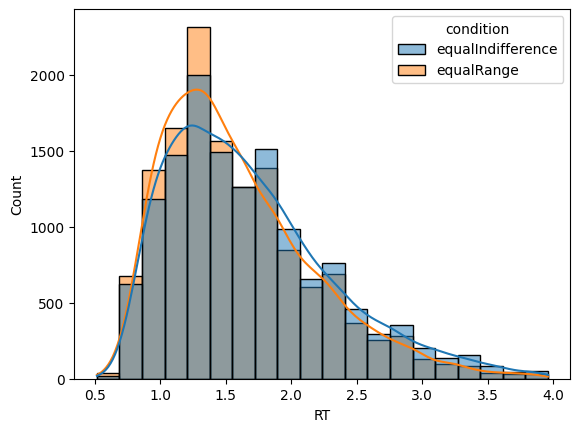

In [5]:
sns.histplot(behav, x='RT', hue='condition', kde=True, bins=20)

#### Load the data
1. Create a new df that condenses the behavioral responses

In [2]:
# Import and process data
pupil_df = pd.read_csv("./data/behavior_pupil.csv")
# Remove trials that are the start of a run, have no response, or have a reaction time less than 0.1
pupil_df = pupil_df.query("is_start_of_run != 1 & response_int.notna() & rt > 0.1")
# Rename columns
pupil_df.rename(columns={"value" : "pupil_size"}, inplace=True)
# create new column called Uncertainty where it is 0 if response_int is 1 or 4 and 1 if response_int is 2 or 3
pupil_df.loc[:, "uncertainty"] = np.where(pupil_df["response_int"].isin([1, 4]), 0, 1)
# create a new column called condition_num where it is 0 if condition is equalRange and 1 if condition is equalIndifference
pupil_df.loc[:, "condition_num"] = np.where(pupil_df["condition"] == "equalRange", 0, 1)
# create a new column called dist_indiff which is | gain - loss | / sqrt(2) for all trials
pupil_df.loc[:, "dist_indiff"] = np.abs(pupil_df["gain"] - pupil_df["loss"]) / np.sqrt(2)

# Remove the time column for just behavior analysis
behavior_df = pupil_df.groupby(['subj_ID', 'condition', 'trial', 'run', 'gain', 'loss', 'dist_indiff'])[["accept", "condition_num", "uncertainty", "rt", 
                                                                                          "response_int", 'numblinks_during_trial',
                                                                                          'numblinks_after_trial', 'numartifacts_during_trial', 
                                                                                          'numartifacts_after_trial']].mean().reset_index()


In [ ]:
sns.lineplot(data=data.query("condition == 'equalRange'"), x='timebin', y='ps_preprocessed', hue='uncertain')


#### Rejecting participants

In [28]:
# Determine average response_int for each subject
avg_responses = behavior_df.groupby(['subj_ID', 'condition'])['uncertainty'].value_counts(normalize=True).rename('proportion').reset_index()

In [30]:
len(avg_responses.query("proportion < 0.2")["subj_ID"].unique())

7

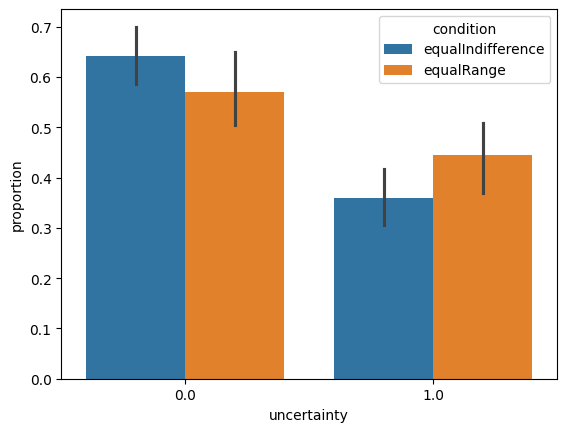

In [29]:
sns.barplot(avg_responses, x = "uncertainty", y = "proportion", hue = "condition")
plt.show()

#### Behavioral response plots

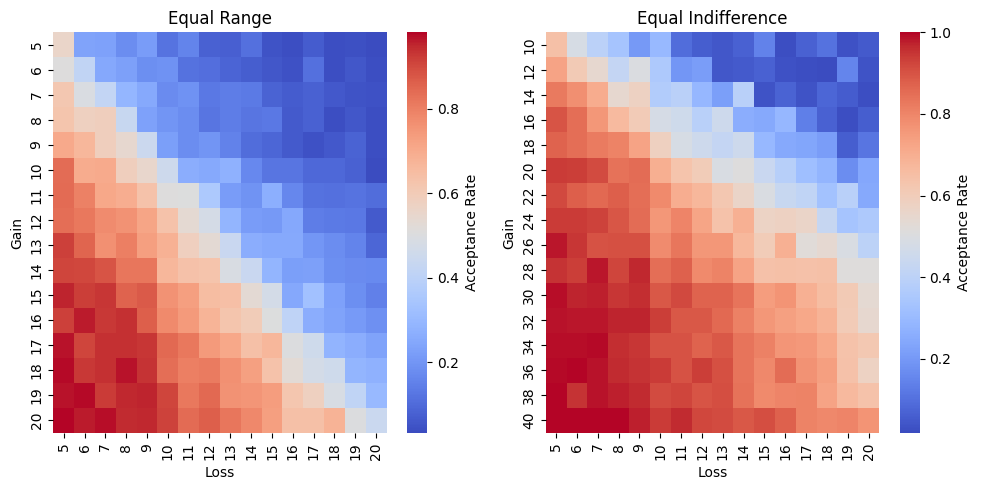

In [6]:
# Two figures: Acceptance rate per condition
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
hmap_data = behav.query("condition == 'equalRange'").groupby(['gain', 'loss'])['prob_accept'].mean().unstack()
sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'Acceptance Rate'}, ax = axs[0])
axs[0].set_title("Equal Range")
axs[0].set_xlabel("Loss")
axs[0].set_ylabel("Gain")

hmap_data = behav.query("condition == 'equalIndifference'").groupby(['gain', 'loss'])['prob_accept'].mean().unstack()
sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'Acceptance Rate'}, ax = axs[1])
axs[1].set_title("Equal Indifference")
axs[1].set_xlabel("Loss")
axs[1].set_ylabel("Gain")
plt.tight_layout()
plt.show()

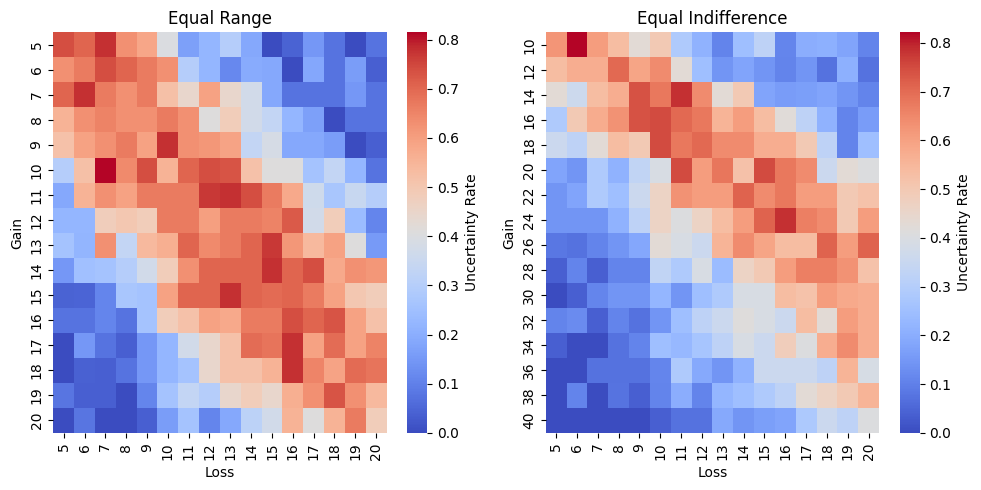

In [4]:
# Two figures: Uncertainty rate per condition
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
hmap_data = behavior_df.query("condition == 'equalRange'").groupby(['gain', 'loss'])['uncertainty'].mean().unstack()
sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'Uncertainty Rate'}, ax = axs[0])
axs[0].set_title("Equal Range")
axs[0].set_xlabel("Loss")
axs[0].set_ylabel("Gain")

hmap_data = behavior_df.query("condition == 'equalIndifference'").groupby(['gain', 'loss'])['uncertainty'].mean().unstack()
sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'Uncertainty Rate'}, ax = axs[1])
axs[1].set_title("Equal Indifference")
axs[1].set_xlabel("Loss")
axs[1].set_ylabel("Gain")
plt.tight_layout()
plt.show()

#### Behavioral response GLMs

In [41]:
%%R -i behavior_df
library(lme4)
# Linear regression model for acceptance rate

# Model 1: Acceptance rate ~ gain + loss + dist_indiff + gain:condition_num + loss:condition_num + dist_indiff:condition_num + (1|subj_ID)
model1 <- glmer(accept ~ gain + loss + dist_indiff + gain:condition_num + loss:condition_num + dist_indiff:condition_num + (1|subj_ID), data=behavior_df, family = binomial)
summary(model1)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
accept ~ gain + loss + dist_indiff + gain:condition_num + loss:condition_num +  
    dist_indiff:condition_num + (1 | subj_ID)
   Data: behavior_df

     AIC      BIC   logLik deviance df.resid 
  6613.1   6673.3  -3298.5   6597.1    13760 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-261.584   -0.145    0.020    0.193  265.046 

Random effects:
 Groups  Name        Variance Std.Dev.
 subj_ID (Intercept) 4.981    2.232   
Number of obs: 13768, groups:  subj_ID, 55

Fixed effects:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -0.30300    0.32295  -0.938  0.34814    
gain                       0.72796    0.02094  34.767  < 2e-16 ***
loss                      -0.70513    0.02042 -34.539  < 2e-16 ***
dist_indiff                0.04388    0.03662   1.198  0.23086    
gain:condition_num       

In [44]:
%%R
coefficients <- summary(model1)$coefficients
# Transform log-odds coefficients to probabilities
probabilities <- 1 / (1 + exp(-coefficients[, "Estimate"]))
probabilities <- cbind(Probability = probabilities)
rownames(probabilities) <- rownames(coefficients)
probabilities

                          Probability
(Intercept)                 0.4248254
gain                        0.6743573
loss                        0.3306762
dist_indiff                 0.5109686
gain:condition_num          0.4168703
loss:condition_num          0.5406403
dist_indiff:condition_num   0.4631202


In [52]:
1 / (1 + np.exp(-(0.72796 -0.33563))), 1 / (1 + np.exp(-(-0.70513 + 0.16292))), 1 / (1 + np.exp(-(0.04388 -0.14779)))

(np.float64(0.5968434733052146),
 np.float64(0.36767362986498003),
 np.float64(0.4740458486693945))

This is DHARMa 0.4.7. For overview type '?DHARMa'. For recent changes, type news(package = 'DHARMa')
DHARMa:testOutliers with type = binomial may have inflated Type I error rates for integer-valued distributions. To get a more exact result, it is recommended to re-run testOutliers with type = 'bootstrap'. See ?testOutliers for details


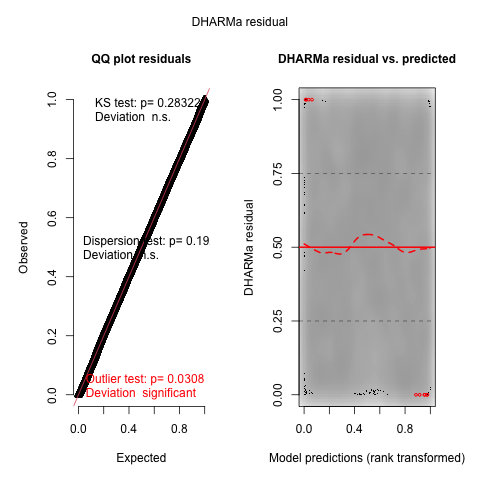

In [58]:
%%R
library(DHARMa)
simulated_residuals <- simulateResiduals(fittedModel = model1)
plot(simulated_residuals)

In [53]:
%%R -i behavior_df
library(lme4)
# Linear regression model for uncertainty rate

# Model 2: Uncertainty rate ~ gain + loss + dist_indiff + gain:condition_num + loss:condition_num + dist_indiff:condition_num + (1|subj_ID)
model2 <- glmer(uncertainty ~ gain + loss + dist_indiff + gain:condition_num + loss:condition_num + dist_indiff:condition_num + (1|subj_ID), data=behavior_df, family = binomial)
summary(model2)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: uncertainty ~ gain + loss + dist_indiff + gain:condition_num +  
    loss:condition_num + dist_indiff:condition_num + (1 | subj_ID)
   Data: behavior_df

     AIC      BIC   logLik deviance df.resid 
 13538.4  13598.6  -6761.2  13522.4    13760 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3378 -0.5887 -0.2235  0.6427 16.1282 

Random effects:
 Groups  Name        Variance Std.Dev.
 subj_ID (Intercept) 2.256    1.502   
Number of obs: 13768, groups:  subj_ID, 55

Fixed effects:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                0.514809   0.220053   2.339  0.01931 *  
gain                      -0.005584   0.007316  -0.763  0.44532    
loss                       0.021490   0.007317   2.937  0.00331 ** 
dist_indiff               -0.556645   0.015693 -35.470  < 2e-16 ***
gain:condition_num        

In [54]:
%%R
coefficients <- summary(model2)$coefficients
# Transform log-odds coefficients to probabilities
probabilities <- 1 / (1 + exp(-coefficients[, "Estimate"]))
probabilities <- cbind(Probability = probabilities)
rownames(probabilities) <- rownames(coefficients)
probabilities

                          Probability
(Intercept)                 0.6259331
gain                        0.4986041
loss                        0.5053723
dist_indiff                 0.3643241
gain:condition_num          0.5666476
loss:condition_num          0.4456093
dist_indiff:condition_num   0.5127385


In [56]:
1 / (1 + np.exp(-(-0.005584 +0.268186))), 1 / (1 + np.exp(-(0.021490 -0.218427))), 1 / (1 + np.exp(-(-0.556645 + 0.050965)))

(np.float64(0.5652758131189265),
 np.float64(0.4509242610986357),
 np.float64(0.3762067791113626))

#### Response time plots

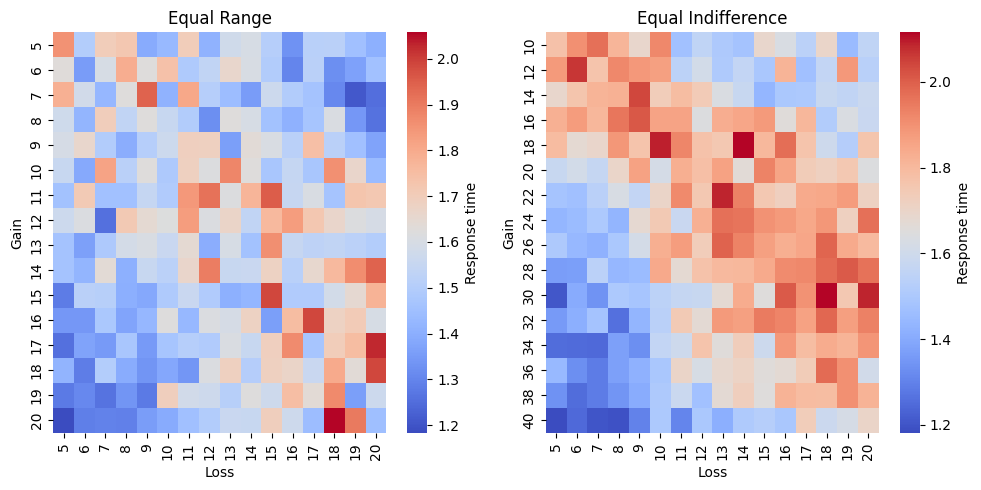

In [59]:
# Two figures: Response time per condition
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
hmap_data = behavior_df.query("condition == 'equalRange'").groupby(['gain', 'loss'])['rt'].mean().unstack()
sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'Response time'}, ax = axs[0])
axs[0].set_title("Equal Range")
axs[0].set_xlabel("Loss")
axs[0].set_ylabel("Gain")

hmap_data = behavior_df.query("condition == 'equalIndifference'").groupby(['gain', 'loss'])['rt'].mean().unstack()
sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'Response time'}, ax = axs[1])
axs[1].set_title("Equal Indifference")
axs[1].set_xlabel("Loss")
axs[1].set_ylabel("Gain")
plt.tight_layout()
plt.show()

#### Response time GLMs

In [62]:
%%R -i behavior_df
library(lme4)
library(lmerTest)
# Linear regression model for response time

# Model 1: response time ~ gain + loss + dist_indiff + gain:condition_num + loss:condition_num + dist_indiff:condition_num + (1|subj_ID)
model3 <- lmer(rt ~ gain + loss + dist_indiff + gain:condition_num + loss:condition_num + dist_indiff:condition_num + (1|subj_ID), data=behavior_df)
summary(model3)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
rt ~ gain + loss + dist_indiff + gain:condition_num + loss:condition_num +  
    dist_indiff:condition_num + (1 | subj_ID)
   Data: behavior_df

REML criterion at convergence: 19892.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5873 -0.6641 -0.1592  0.5075  5.2741 

Random effects:
 Groups   Name        Variance Std.Dev.
 subj_ID  (Intercept) 0.09813  0.3133  
 Residual             0.24262  0.4926  
Number of obs: 13768, groups:  subj_ID, 55

Fixed effects:
                            Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)                1.622e+00  4.563e-02  7.169e+01  35.554  < 2e-16 ***
gain                      -9.480e-04  1.280e-03  1.193e+04  -0.741    0.459    
loss                       9.470e-03  1.279e-03  1.195e+04   7.403 1.42e-13 ***
dist_indiff               -3.429e-02  2.230e-03  1.373e+04 -15.373  < 2e-16 ***
gain:condition_num    


Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



In [74]:
# Compute blink rate by dividing the number of blinks during the trial by the response time
behavior_df.loc[:, "blink_rate"] = behavior_df["numblinks_during_trial"] / behavior_df["rt"] + 0.0001
# Compute artifact rate by dividing the number of artifacts during the trial by the response time
behavior_df.loc[:, "artifact_rate"] = behavior_df["numartifacts_during_trial"] / behavior_df["rt"]

In [75]:
%%R -i behavior_df

# Model 1: response time ~ gain + loss + dist_indiff + gain:condition_num + loss:condition_num + dist_indiff:condition_num + (1|subj_ID)
model4 <- glmer(blink_rate ~ gain + loss + dist_indiff + gain:condition_num + loss:condition_num + dist_indiff:condition_num + (1|subj_ID), data=behavior_df, family = Gamma(link = "identity"))
summary(model4)

Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  PIRLS loop resulted in NaN value


RInterpreterError: Failed to parse and evaluate line '\n# Model 1: response time ~ gain + loss + dist_indiff + gain:condition_num + loss:condition_num + dist_indiff:condition_num + (1|subj_ID)\nmodel4 <- glmer(blink_rate ~ gain + loss + dist_indiff + gain:condition_num + loss:condition_num + dist_indiff:condition_num + (1|subj_ID), data=behavior_df, family = Gamma(link = "identity"))\nsummary(model4)\n'.
R error message: 'Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : \n  PIRLS loop resulted in NaN value'